In [64]:
competition_link = "https://www.kaggle.com/competitions/titanic"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [65]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()
titanic_test = pd.read_csv('titanic_test.csv')

In [66]:
objs = []
for class_name in titanic.columns:
    if titanic[class_name].dtype == 'object':
        objs.append(class_name)
    
objs


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [67]:
le = LabelEncoder()
for i in objs:
    titanic[i] = le.fit_transform(titanic[i] )
    titanic_test[i] = le.fit_transform(titanic_test[i])

<Axes: >

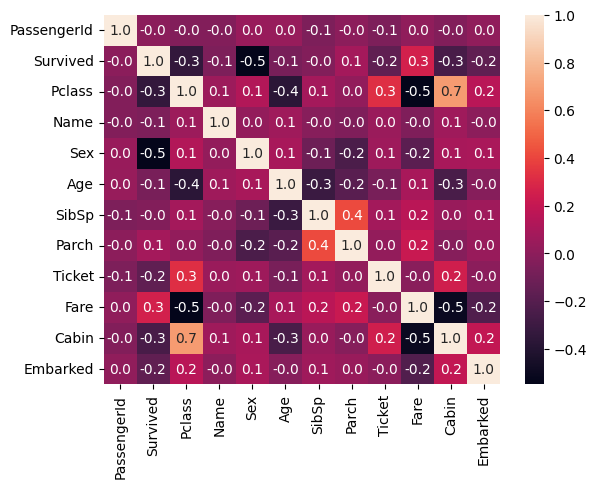

In [68]:
correlation_matrix = titanic.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.1f')

In [69]:
titanic.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket'],axis='columns',inplace=True)
titanic_test.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket'],axis='columns',inplace=True)

In [70]:
Survived = titanic[titanic['Survived'] == 1].sample(549 -342 )

In [71]:
titanic = pd.concat([titanic,Survived],axis='rows')
titanic = titanic.sample(frac=1,ignore_index=True)

In [72]:
norm = []
for class_name in titanic.columns:
    if (len(titanic[class_name].unique()) >10) and (max(titanic[class_name]) > 1):
        norm.append(class_name)
        

norm


['Fare', 'Cabin']

In [73]:
sc=MinMaxScaler()
for name in norm:
    titanic[name] = sc.fit_transform(np.reshape(titanic[name],(-1,1)))
    titanic_test[name] = sc.transform(np.reshape(titanic_test[name],(-1,1)))

In [74]:
titanic_test.head()

,Pclass,Sex,Fare,Cabin,Embarked
0,3,1,0.015282,0.517007,1
1,3,0,0.013663,0.517007,2
2,2,1,0.018909,0.517007,1
3,3,1,0.016908,0.517007,2
4,3,0,0.023984,0.517007,2


In [75]:
titanic.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked
0,0,3,1,0.042315,1.000000,0
1,1,3,0,0.015200,1.000000,1
2,1,3,0,0.021731,1.000000,2
3,1,1,0,0.264739,0.605442,2
4,1,3,0,0.021731,1.000000,2


In [76]:
for names in titanic.columns:
    titanic[names].fillna(value=titanic[names].mode(),inplace=True)
titanic['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [77]:
titanic['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [78]:
x = titanic.drop(['Survived'],axis='columns')
y = titanic['Survived']
col  = x.columns

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(x)
x = imputer.transform(x)
x = pd.DataFrame(x,columns= col)
titanic_test = imputer.transform(titanic_test)
titanic_test = pd.DataFrame(titanic_test,columns=col)



In [80]:
x.tail(5)

,Pclass,Sex,Fare,Cabin,Embarked
1093,3.0,0.0,0.015094,1.0,1.0
1094,3.0,1.0,0.014110,1.0,0.0
1095,2.0,1.0,0.064412,1.0,2.0
1096,2.0,1.0,0.050749,1.0,2.0
1097,3.0,1.0,0.038972,1.0,2.0


In [81]:
x = np.array(x)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators': [50,100,500] , 'max_depth' : [None,8,17,25],'min_samples_split':[None,2,3,4]}]

model = GridSearchCV(RandomForestClassifier() , param_grid= param_grid , cv= 5,scoring='accuracy', return_train_score=True,verbose=3)

In [83]:
model.fit(x,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_split=None, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_split=None, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_split=None, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_split=None, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_split=None, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_split=None, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_split=None, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_split=None, n_estimators=100;, score=(train=nan, test=nan) total time

c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\mohan\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 8, 17, 25],
                          'min_samples_split': [None, 2, 3, 4],
                          'n_estimators': [50, 100, 500]}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [84]:
final_model = model.best_estimator_

In [85]:
final_model

RandomForestClassifier(min_samples_split=3, n_estimators=50)

In [87]:
titanic_test_pred = final_model.predict(titanic_test)

c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
titanic_test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [88]:
PassengerId = pd.read_csv('titanic_test.csv',usecols=['PassengerId'])

In [89]:
PassengerId.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [90]:
output_titanic = pd.DataFrame({ 'PassengerId' : PassengerId.PassengerId,'Survived':titanic_test_pred})

In [91]:
output_titanic.to_csv('submission.csv',index=False)